<a href="https://colab.research.google.com/github/ramimagnatera/ADA-informes/blob/main/Informe11_BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del Problema

El problema del **camino más corto** tiene como objetivo encontrar la distancia más corta entre un vértice inicial $s$ y todos los nodos de un grafo $G=(V,E)$, siendo V el conjunto de nodos y E el conjunto de arcos.  

**Entrada**: *Grafo dirigido $G=(V,E)$*

**Salida**: *Distancia más corta entre un nodo inicial y todo el resto de nodos del grafo*

Este es un problema de optimización combinatoria bastante conocido, debido a que aparece en diversas áreas tanto de ingenieria como de las ciencias y con variadas aplicaciones o usos cotidianos. Por ejemplo al momento de calcular la ruta más corta entre ciudades o para operaciones transaccionales entre muchas otras.

# 2. Bellman-Ford

## 2.1 Descripción del Algoritmo

El algoritmo Bellman-Ford encuentra el camino más corto entre un nodo raiz y todo el resto de nodos de un grafo. Este grafo puede tener arcos con valores tanto positivos como negativos, a diferencia del algoritmo de Dijkstra el cual solo permite valores positivos. El algoritmo retorna una lista con todos los caminos más cortos entre el nodo raiz y el resto de nodos, sin embargo, el algoritmo Bellman-Ford no funciona si existe un ciclo negativo dentro del grafo, por lo que en dicho caso retornara una lista vacía junto un mensaje de que el grafo no está permitido. El algoritmo implementa la programación dinámica para resolver este problema. 

<a href="https://imgur.com/bhjsZdn"><img src="https://imgur.com/bhjsZdn.png" title="source: imgur.com" /></a>

**Subestructura óptima**:

- El camino más corto contiene $i-1$ arcos o menos.*
- $P$ es, para algún valor $w \in V$, la ruta más corta $s\leadsto w$ con $i-1$ arcos o menos, adicionada con el arco $(w,v) \in E$.*

**Función de recurrencia**:

<a href="https://imgur.com/z3XECfd"><img src="https://imgur.com/z3XECfd.png" title="source: imgur.com" /></a>

- La ruta más corta tiene $i-1$ arcos o menos, por lo tanto, bastaría con encontrar la ruta más corta para $i-1$ arcos o menos. **(caso 1)**
- La ruta más corta tiene efectivamente $i$ arcos, por lo que realizamos la subdivisión de subproblemas explicada anteriormente. **(caso 2)**

A continuación se explicará paso a paso lo que realiza el algoritmo: 

1.   Se crea un arreglo auxiliar (dist) de tamaño igual a $V$ (cantidad de nodos en el grafo) y se inicializan en infinito excepto el primer elemento el cual será igual a 0.

2.   Se itera $V$ veces, y en cada iteración i para cada arco (u,v). Sí dist[v] > dist[u] + w(u,v), entonces dist[v] = dist[u] + w(u,v).

3.   Luego de terminar con el ciclo anterior, debemos comprobas que no exista un ciclo negativo dentro del grafo, por lo que iteramos $V$ veces y en cada iteración j para cada arco (u,v). Sí dist[v] > dist[u] + w(u,v), entonces podemos decir que el grafo tiene un ciclo negativo y imprime por pantalla.

4. Finalmente, en caso de no existir un ciclo negativo se retorna la lista con las distancias más cortas entre nodos.



##2.2 Código

###A continuación se mostrará la implementación del algoritmo Bellman-Ford:


In [94]:
## GENERADOR DE INSTANCIAS BELLMAN-FORD

import random
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)
def instance_generator_bellman(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))
        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number
                if iterations >= 250:
                    return instance_generator_bellman(n)           
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.         
            graph.append(edge_with_weight)
            generated_edges[edge] = edge
            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])
    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge
        if iterations >= 250:
            return instance_generator_bellman(n)

    return graph, graph[0][0]

In [97]:
from sys import maxsize
import networkx as nx
def BellmanFord(graph, V, E, src, verbose, visualizer):
 
    # crea la matriz y inicializa la 
    # distancia a los vertices en infinito
    dis = [maxsize] * V
 
    # inicializa la distancia del nodo raiz en 0
    dis[src] = 0
 
    for i in range(V - 1):
        if(verbose == True):
          print("\nIteración número:",i,end="\n\n")
        for j in range(E):
            if(verbose == True):
              print("Arco número:",j,end="\n\n")
              print("si",dis[graph[j][0]],"+",graph[j][2],"<",dis[graph[j][1]])

            if dis[graph[j][0]] + graph[j][2] < dis[graph[j][1]]:
                dis[graph[j][1]] = dis[graph[j][0]] + graph[j][2]
                if(verbose == True):
                   print("entonces",dis[graph[j][1]],"=", dis[graph[j][0]],"+", graph[j][2])
                   print(dis,end="\n\n")
            else:
              if(verbose == True): 
                print("No se cumple")
                print(dis,end="\n\n")
                
    for i in range(E):
        x = graph[i][0]
        y = graph[i][1]
        weight = graph[i][2]
        if dis[x] != maxsize and dis[x] + weight < dis[y]:
            dis = []
            return dis
    
    if(visualizer == True):
        G = graph_to_nxdigraph(graph,V)
        pos=nx.spring_layout(G)
        #pos = graphviz_layout(G, prog="dot")

        # para mostrar los arcos con sus etiquetas
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=14)

        # para mostrar los nodos en sus posiciones y colores, tamaños, etc.
        nx.draw(G,pos, with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")
    return dis
 
# Ejemplo
V = 5 # Número de nodos

graph,root = instance_generator_bellman(V)

print("Arcos del grafo\nNodo inicial:Nodo destino:Peso del arco")
for i in range(V):
  print(graph[i], end="\n")

distancias = BellmanFord(graph, V, len(graph), root, False, False)

if(distancias): 
  print("\nDistancia mínima entre nodos")
  for i in range(V):
    print("%d\t\t%d" % (i, distancias[i]))
else:
  print("El grafo contiene ciclos negativos")

Arcos del grafo
Nodo inicial:Nodo destino:Peso del arco
(0, 4, 43)
(4, 2, 31)
(4, 1, 34)
(3, 0, 34)
(3, 1, 95)

Distancia mínima entre nodos
0		0
1		77
2		74
3		108
4		43


##2.3 Ejemplo:

A continuación se mostrará un ejemplo de como funciona el algoritmo **Bellman-Ford**:

<a href="https://imgur.com/AGQVtfw"><img src="https://imgur.com/AGQVtfw.png" title="source: imgur.com" /></a>

1.   Primero se inicializa la matriz de distancias en infinito y la raiz en 0

2.   Se itera tantas veces como nodos existan en el grafo (para comprobar todos los caminos posibles hacia los nodos) 

3. Luego vemos las conexiones de la raiz y guardamos su distancia en el arreglo de distancias

4. Repetimos este proceso hasta comprobar todos los posibles caminos a los nodos

El ejemplo está a modo de resumen y solamente en los casos que se guardan los valores en el arreglo de distancias, puesto que al realizar por cada nodo y recorrer todos los arcos posibles quedaría un ejemplo muy grande. (En la opción verbose=true se puede ver mejor representado lo que hace el algoritmo en cada iteración).





##2.4. Ejecución del algoritmo paso a paso con verbose = True

In [ ]:
V = 4 # Número de nodos

graph,root = instance_generator_bellman(V)

print("Arcos del grafo\nNodo inicial:Nodo destino:Peso del arco")
for i in range(V):
  print(graph[i], end="\n")

distancias = BellmanFord(graph, V, len(graph), root, True, False)

print("Distancia mínima entre nodos")
for i in range(V):
    print("%d\t\t%d" % (i, distancias[i]))

# 3. Dijkstra

## 3.1 Descripción del Algoritmo

El algoritmo Dijkstra, al igual que el visto anteriormente, encuentra el camino más corto entre un nodo raiz y todo el resto de nodos de un grafo. Este grafo puede tener arcos con valores **exclusivamente** positivos. El algoritmo retorna una lista con todos los caminos más cortos entre el nodo raiz y el resto de nodos, excepto en el caso que  exista un ciclo negativo dentro del grafo, ya que en dicho caso retornara una lista vacía junto un mensaje de que el grafo no está permitido.

<a href="https://imgur.com/bhjsZdn"><img src="https://imgur.com/bhjsZdn.png" title="source: imgur.com" /></a>

Siga los pasos a continuación para resolver el problema:

1. Asigne un valor de distancia a todos los vértices en el gráfico de entrada. Inicializa todos los valores de distancia como infinito y ssigne el valor de distancia como 0 para el vértice de origen para que se elija primero. 

2. Mientras que la cola con proridad no esté vacia, se elige un vértice "u" que no esté en marcado y tenga un valor de distancia mínimo. 

  2.1 Marque el vertice "u". 

  2.2 Luego actualice el valor de distancia de todos los vértices adyacentes de "u". Para actualizar los valores de distancia, itere a través de todos los vértices adyacentes. Para cada vértice adyacente v, si la suma del valor de la distancia de u (desde la fuente) y el peso del borde uv es menor que el valor de la distancia de v, actualice el valor de la distancia de v. 


##3.2 Código

###A continuación se mostrará la implementación del algoritmo Dijkstra:


In [99]:
## GENERADOR DE INSTANCIAS Dijkastra
import random
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator_dijkastra(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))
        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))           
            if generated_edges.get((edge[1], edge[0]), None):
                continue          
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number
                if iterations >= 250:
                    return instance_generator_dijkastra(n)                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(1, 100)) # 0 y 100 corresponde a los límites de los pesos          
            graph.append(edge_with_weight)
            generated_edges[edge] = edge
            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(0, 100)) # 0 y 100 corresponde a los límites de los pesos
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator_dijkastra(n)

    return graph, graph[0][0]

In [134]:
from queue import PriorityQueue

class Graph:
    def __init__(self, num_of_vertices):
        self.v = num_of_vertices
        self.edges = [[-1 for i in range(num_of_vertices)] for j in range(num_of_vertices)]
        self.visited = []

    def add_edge(self, u, v, weight):
        self.edges[u][v] = weight
        self.edges[v][u] = weight

def dijkstra(graph, start_vertex):

    D = {v:float('inf') for v in range(graph.v)}

    D[start_vertex] = 0

    # Se crea una cola con prioridad
    pq = PriorityQueue()
    pq.put((0, start_vertex))

    # Mientras la cola no esté vacia
    while not pq.empty():
        (dist, current_vertex) = pq.get()
        graph.visited.append(current_vertex)

        for neighbor in range(graph.v):
            if graph.edges[current_vertex][neighbor] != -1:
                distance = graph.edges[current_vertex][neighbor]
                if neighbor not in graph.visited:
                    old_cost = D[neighbor]
                    new_cost = D[current_vertex] + distance
                    if new_cost < old_cost:
                        pq.put((new_cost, neighbor))
                        D[neighbor] = new_cost
    return D

def añadir_nodos(arr,n):
  g = Graph(n)
  for i in arr:
    g.add_edge(i[0], i[1], i[2])
  return g

n = 5

dis,root = instance_generator_dijkastra(n)

g = añadir_nodos(dis,n)

distancias = dijkstra(g, root)

print("Distancia mínima entre nodos")
for i in range(V):
    print("%d\t\t%d" % (i, distancias[i]))

Distancia mínima entre nodos
0		0
1		41
2		62
3		108


##Visualizer Bellman-Ford


In [95]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

Arcos del grafo
Nodo inicial:Nodo destino:Peso del arco
(3, 4, 14)
(3, 0, 37)
(0, 4, 40)
(4, 1, 19)
(4, 2, 74)
Distancia mínima entre nodos
0		37
1		33
2		86
3		0
4		14


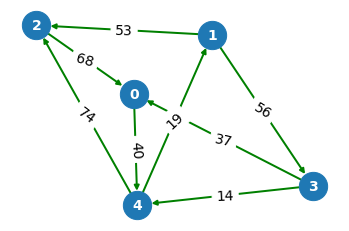

In [ ]:
V = 5 # Número de nodos
graph,root = instance_generator_bellman(V)

print("Arcos del grafo\nNodo inicial:Nodo destino:Peso del arco")
for i in range(V):
  print(graph[i], end="\n")

distancias = BellmanFord(graph, V, len(graph), root, False, True)

print("Distancia mínima entre nodos")
for i in range(V):
    print("%d\t\t%d" % (i, distancias[i]))

# 3. Tiempo de ejecución Bellman-Ford

### **Teorema (Tiempo de ejecución).**

  *El algoritmo **Bellman Ford** tiene un **tiempo de ejecución promedio de** $O(V*E)$, siendo V el número de vertices y E el número de arcos* 

## Prueba del teorema

Para comprobar el tiempo de ejecución del algoritmo, podemos hacerlo viendo su pseudocódigo y analizando lo que este realiza: 

<a href="https://imgur.com/HXWBvQU"><img src="https://imgur.com/HXWBvQU.png" title="source: imgur.com" /></a>

* El primer ciclo for (linea 2) recorre los $V-1$ nodos, por lo que se obtiene una complejidad de $O(V)$.

* El segundo ciclo anidado (linea 3) itera la cantidad $E$ de arcos en el grafo, por lo que tiene una complejidad de $O(E)$

Al ser 2 ciclos anidados, la complejidad final de algoritmo es de O(V*E)




# 4. Correctitud Bellman-Ford

### **Teorema**

*Dado un grafo $G = (V,E)$ y un nodo de origen $S$, el algoritmo encuentra el camino más corto a cada nodo $v$ ∈ $V$*.

## Prueba del Teorema

Para resolver el teorema lo haremos mediante inducción matemática.

Hipótesis: *Luego de cada iteración, cada nodo $v$ ∈ $V$, $D[v,i]$ almacena el camino más corto desde $s$ hasta $v$ ocupando a lo máximo i arcos de por medio.*

Caso Base ($i=1$): 

En la primera iteración, todos los valores de $D[v,i]$ van a estar inicializados en infinito excepto $D[s,i]$ el cual va a estar inicializado en 0. Por lo que hasta el momento se va a haber guardado el camino más corto hacia todos los nodos.

Caso General ($i>1$): 

Para el caso general, debemos asumir que existe un camino más corto entre $s$ y $v$. Y diremos que el nodo $u$ es el anterior a $v$ en dicha ruta.

Luego de una i-ésima iteración, por hipótesis inductiva podemos decir que en $D[u,i]$ se guarda la distancia más corta entre el nodo $s$ y el nodo $u$, por lo que en la siguente iteración podemos asegurar que se cumple que $D[v,i+1] ≤ D[u,i] + w(u,v)$ debido al propio funcionamiento del algoritmo. También podemos decir que $D[v,i+1]$ es igual o mayor al camino más corto entre los nodos $s$ y $v$ utilizando minimo i+1. Por lo que después de una i-ésima, en $D[v,i+1]$ se irá guardando el largo del camino más corto entre los nodos $s$ y $v$ con i+1 arcos como máximo.
 
**Correctitud**

Como se pudo comprobar, tanto para un caso base como para un caso general, se cumple que en $D[v,n-1]$ se almacena el camino más corto entre un nodo inicial $s$ hasta un nodo $v$ con un máximo de n-1 arcos. Por lo que se puede decir que el algoritmo Bellman-Ford es correcto. 

# 5. Experimentos

## 5.1. Número de comparaciones

Para el algoritmo Bellman-Ford, genere al menos 25 instancias distintas para cada tamaño n de entrada y calcule la media de tiempo que demoran. Grafique y analice estos resultados. ¿Qué tanto se asemejan al tiempo de ejecución teórico?

Recibe de entrada grafos generados aleatoriamente con pesos tanto positivos como negativos.

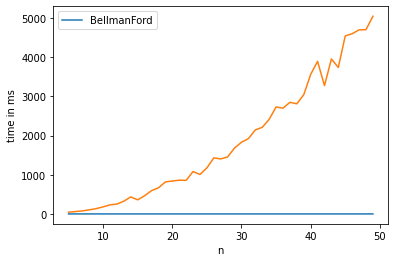

In [109]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]
verbose = False

for n in range(5,50):
  graph,root = instance_generator_bellman(n)

  t1 = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({graph}, {n}, {len(graph)}, {root}, {False}, {False})", repeat=1, number=25)

  x.append(n)
  y.append(t1)

plt.plot(x,y)
plt.legend(["BellmanFord"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

# 5. Experimentos

## 5.1. Número de comparaciones

Comparacion entre dijkstra y bellman-ford

In [ ]:
x=[]; y=[]; y1=[]
verbose = False

for n in range(5,50):
  graph,root = instance_generator_bellman(n)

  dis,r = instance_generator_dijkastra(n)
  g = añadir_nodos(dis,n)

  t1 = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({graph}, {n}, {len(graph)}, {root}, {False}, {False})", repeat=1, number=25)
  t2 = repeat(setup="from __main__ import dijkstra", stmt=f"dijkstra({g}, {r})", repeat=1, number=25)

  x.append(n)
  y.append(t1)
  y1.append(t2)

plt.plot(x,y)
plt.legend(["BellmanFord"],["Dijkstra"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()